# W7 4th Hour with TA ([Opal](https://opaliss.github.io/opalissan/))

How to get started with Python? A guide to installation and setting up a virtual enviroment:  https://www.python.org/about/gettingstarted/

In [1]:
# import essential Python packages 'numpy' and 'scipy'
import numpy as np 
import scipy

In [2]:
# import plotting package 'matplotlib' in Python
import matplotlib.pyplot as plt
import matplotlib

# set up preferred fontsize etc...
font = {'family' : 'serif',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

### Fourier Series and Fourier Transform

Week 5-7 lecture notes discussed the **continuous** $x(t)$ formulation of the Fourier series and Fourier transform. In weeks 8-10, we will discuss the **discrete** $x[n]$ analog. As expected, the discrete and continuous formulations match at the *limit of infinitely fine data* resolution.  

The two-dimensional continuous Fourier transform of $x(t_{1}, t_{2})$ is defined as 
$$
X(\omega_{1}, \omega_{2}) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} x(t_{1}, t_{2}) e^{-i (\omega_{1} t_{1} + \omega_{2} t_{2}) }\mathrm{d} t_{1} \mathrm{d} t_{2}
$$

The discrete Fourier transform (DFT) of $x[n, m]$ is defined as 
$$
X[\omega_{1}, \omega_{2}] = \frac{1}{M}\frac{1}{N} \sum_{m=0}^{M-1}  \sum_{n=0}^{N-1} x[n, m] e^{-2\pi i (\frac{m \omega_{1}}{M} + \frac{\omega_{2} n}{N})}
$$
which is the discrete version of the Fourier series approximation (since it also assumes the periodicity of the signal). More on this in the proceeding weeks! 

*Discussion questions*: 

(1) What is more memory intensive (a) the original image or (b) its discrete Fourier transform? Why?

(2) What is the computational complexity of computing the discrete Fourier transform? Why?


### Problem (HW6-P5) 
Read into Python/MATLAB the two grayscale images from the canvas page **marilyn.png** and **robert.png**. Before proceeding, please normalize the two images such that the matrix values range from 0 to 1.  

(a) Plot the magnitude and phase of the discrete Fourier transform of the two images.

In [3]:
# read in the images 
marilyn= plt.imread("marilyn.png")
robert = plt.imread("robert.png") 

In [4]:
# normalize both images to be in the range of [0, 1]
marilyn = marilyn / np.max(marilyn)
robert =  robert / np.max(robert)

In [5]:
# verify the two photos are of the same size
print("Marilyn photo is shape = ", marilyn.shape)
print("Robert photo is shape = ", robert.shape)

Marilyn photo is shape =  (350, 350)
Robert photo is shape =  (350, 350)


In [6]:
# dimension of the squared images
N = robert.shape[0]

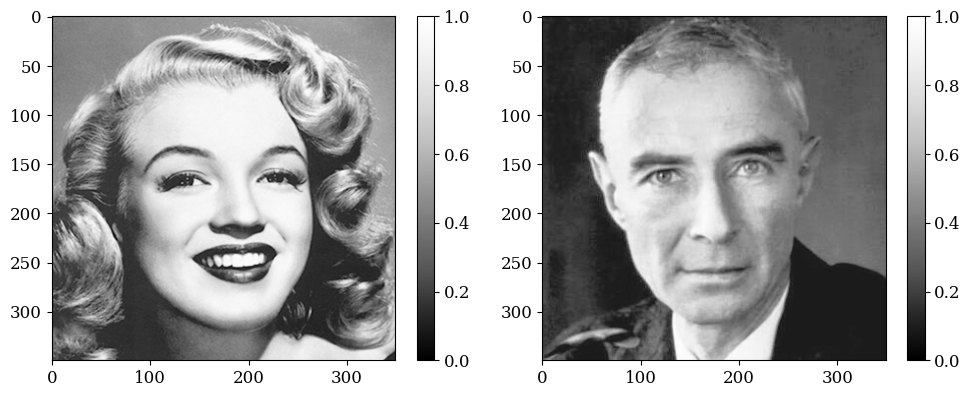

In [7]:
# plot the two images side by side
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
pos = ax[0].imshow(marilyn, cmap="Greys_r", vmax=1, vmin=0)
fig.colorbar(pos, ax=ax[0])
pos = ax[1].imshow(robert, cmap="Greys_r", vmax=1, vmin=0)
fig.colorbar(pos, ax=ax[1])
plt.tight_layout()

In [8]:
# compute the 2D DFT of both images using the Fast Fourier Transform (FFT)
FFT_marilyn = np.fft.fft2(marilyn)
FFT_robert = np.fft.fft2(robert)

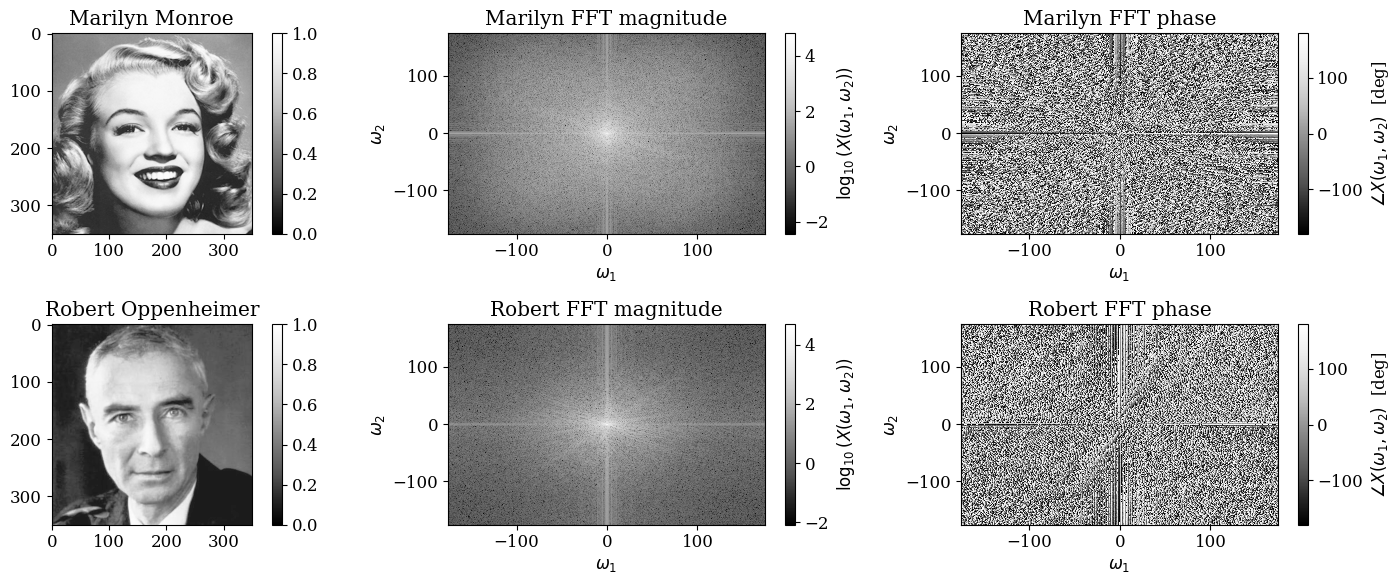

In [9]:
# plot the magnitude and phase of the FFT results
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 6))
pos = ax[0, 0].imshow(marilyn, cmap="Greys_r", vmin=0, vmax=1)
fig.colorbar(pos, ax=ax[0, 0])
ax[0, 0].set_title("Marilyn Monroe")
pos = ax[0, 1].pcolormesh(np.arange(-N//2, N//2), np.arange(-N//2, N//2), np.log10(np.abs(np.fft.fftshift(FFT_marilyn))), cmap="Greys_r")
fig.colorbar(pos, ax=ax[0, 1], label=r"$\log_{10}(X(\omega_{1}, \omega_{2}))$")
ax[0, 1].set_xlabel("$\omega_{1}$")
ax[0, 1].set_ylabel("$\omega_{2}$")
ax[0, 1].set_title("Marilyn FFT magnitude")
pos = ax[0, 2].pcolormesh(np.arange(-N//2, N//2), np.arange(-N//2, N//2), np.angle(np.fft.fftshift(FFT_marilyn), deg=True), cmap="Greys_r")
fig.colorbar(pos, ax=ax[0, 2], label=r"$\angle X(\omega_{1}, \omega_{2})$  [deg]")
ax[0, 2].set_title("Marilyn FFT phase")
ax[0, 2].set_xlabel("$\omega_{1}$")
ax[0, 2].set_ylabel("$\omega_{2}$")

pos = ax[1, 0].imshow(robert, cmap="Greys_r", vmin=0, vmax=1)
fig.colorbar(pos, ax=ax[1, 0])
ax[1, 0].set_title("Robert Oppenheimer")
pos = ax[1, 1].pcolormesh(np.arange(-N//2, N//2), np.arange(-N//2, N//2), np.log10(np.abs(np.fft.fftshift(FFT_robert))), cmap="Greys_r")
fig.colorbar(pos, ax=ax[1, 1], label="$\log_{10}(X(\omega_{1}, \omega_{2}))$")
ax[1, 1].set_title("Robert FFT magnitude")
ax[1, 1].set_xlabel("$\omega_{1}$")
ax[1, 1].set_ylabel("$\omega_{2}$")

pos = ax[1, 2].pcolormesh(np.arange(-N//2, N//2), np.arange(-N//2, N//2), np.angle(np.fft.fftshift(FFT_robert), deg=True), cmap="Greys_r")
fig.colorbar(pos, ax=ax[1, 2], label=r"$\angle X(\omega_{1}, \omega_{2})$  [deg]")
ax[1, 2].set_title("Robert FFT phase")
ax[1, 2].set_xlabel("$\omega_{1}$")
ax[1, 2].set_ylabel("$\omega_{2}$")

plt.tight_layout()
plt.savefig("fig_a.png")

(b) Mix the two images in the following manner: (1) plot the magnitude of **marilyn.png**
with the phase of **robert.png** and (2) vice versa. What can you learn from your observations?

In [10]:
# reconstruct mixing between the photos 
# magntitude Marilyn Monroe and phase of J. Robert Oppenheimer
mm_pr = np.fft.ifft2(np.abs(FFT_marilyn) * np.exp(1j * np.angle(FFT_robert)))
# magnitude of J. Robert Oppenheimer and phase Marilyn Monroe 
mr_pm = np.fft.ifft2(np.abs(FFT_robert) * np.exp(1j * np.angle(FFT_marilyn)))

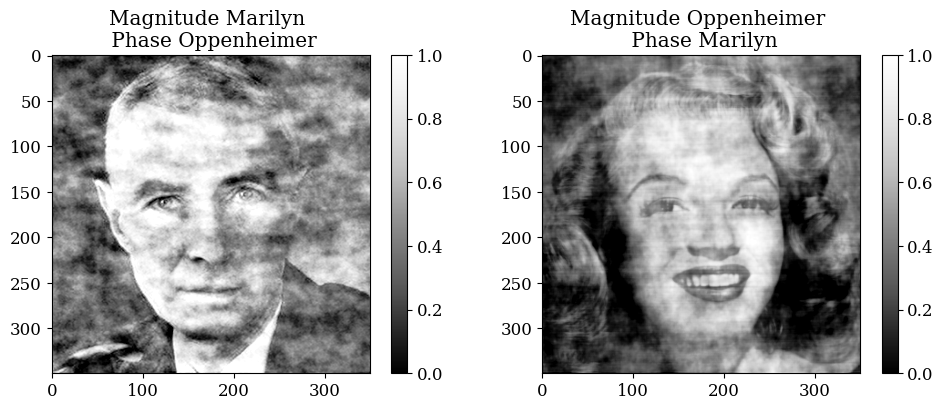

In [11]:
# plot the mixed images 
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
pos = ax[0].imshow(mm_pr.real, cmap="Greys_r", vmin=0, vmax=1)
fig.colorbar(pos, ax=ax[0])
ax[0].set_title("Magnitude Marilyn \n Phase Oppenheimer")
pos = ax[1].imshow(mr_pm.real, cmap="Greys_r", vmin=0, vmax=1)
fig.colorbar(pos, ax=ax[1])
ax[1].set_title("Magnitude Oppenheimer \n Phase Marilyn")
plt.tight_layout()

(c) Use an ideal low-pass filter with ωc = 5, 10, 20, 50. Plot the filtered images for
both **marilyn.png** and **robert.png**. Analyze/discuss your results.

In [12]:
# define a function that is an 'ideal' low-pass filter
def image_low_pass_filter(image_fft, n):
    # Apply a low-pass filter 
    N = np.shape(image_fft)[0]
    FFT_lp = np.zeros((N, N), dtype="complex128")
    FFT_lp[N//2-n: N//2+n, N//2-n:N//2+n] = np.fft.fftshift(image_fft)[N//2-n: N//2+n, N//2-n:N//2+n]
    return np.fft.ifft2(np.fft.ifftshift(FFT_lp))

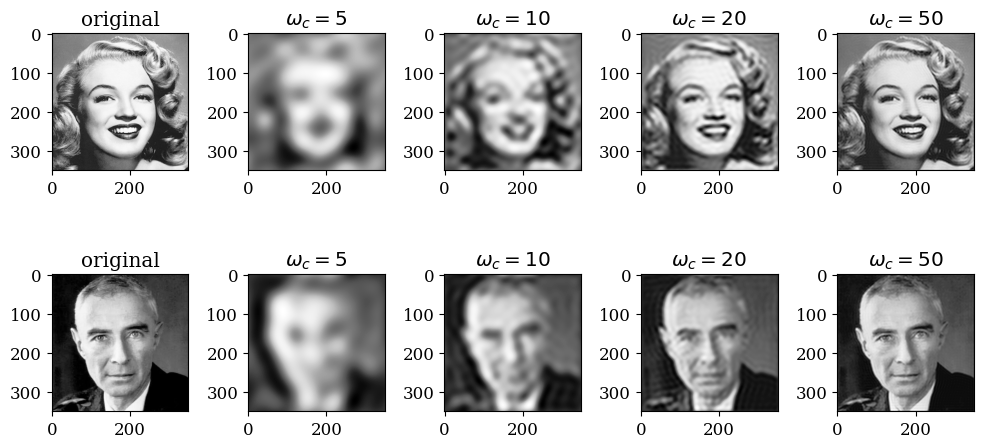

In [13]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
ax[0, 0].imshow(marilyn, cmap="Greys_r")
ax[0, 0].set_title("original")
ax[0, 1].imshow(image_low_pass_filter(FFT_marilyn, n=5).real, cmap="Greys_r")
ax[0, 1].set_title("$\omega_{c}=5$")
ax[0, 2].imshow(image_low_pass_filter(FFT_marilyn, n=10).real, cmap="Greys_r")
ax[0, 2].set_title("$\omega_{c}=10$")
ax[0, 3].imshow(image_low_pass_filter(FFT_marilyn, n=20).real, cmap="Greys_r")
ax[0, 3].set_title("$\omega_{c}=20$")
ax[0, 4].imshow(image_low_pass_filter(FFT_marilyn, n=50).real, cmap="Greys_r")
ax[0, 4].set_title("$\omega_{c}=50$")

ax[1, 0].imshow(robert, cmap="Greys_r")
ax[1, 0].set_title("original")
ax[1, 1].imshow(image_low_pass_filter(FFT_robert, n=5).real, cmap="Greys_r")
ax[1, 1].set_title("$\omega_{c}=5$")
ax[1, 2].imshow(image_low_pass_filter(FFT_robert, n=10).real, cmap="Greys_r")
ax[1, 2].set_title("$\omega_{c}=10$")
ax[1, 3].imshow(image_low_pass_filter(FFT_robert, n=20).real, cmap="Greys_r")
ax[1, 3].set_title("$\omega_{c}=20$")
ax[1, 4].imshow(image_low_pass_filter(FFT_robert, n=50).real, cmap="Greys_r")
ax[1, 4].set_title("$\omega_{c}=50$")
plt.tight_layout()

(d) Use an ideal high-pass filter with ωc = 5, 10, 20, 50. Plot the filtered images
for both **marilyn.png** and **robert.png**. Analyze/discuss your results

In [14]:
# define a function that is an 'ideal' high-pass filter
def image_high_pass_filter(image_fft, n):
    # Apply a high-pass filter 
    N = np.shape(image_fft)[0]
    FFT_hp = np.copy(np.fft.fftshift(image_fft))
    FFT_hp[N//2-n: N//2+n, N//2-n:N//2+n] = np.zeros((2*n, 2*n), dtype="complex128")
    return np.fft.ifft2(np.fft.ifftshift(FFT_hp))

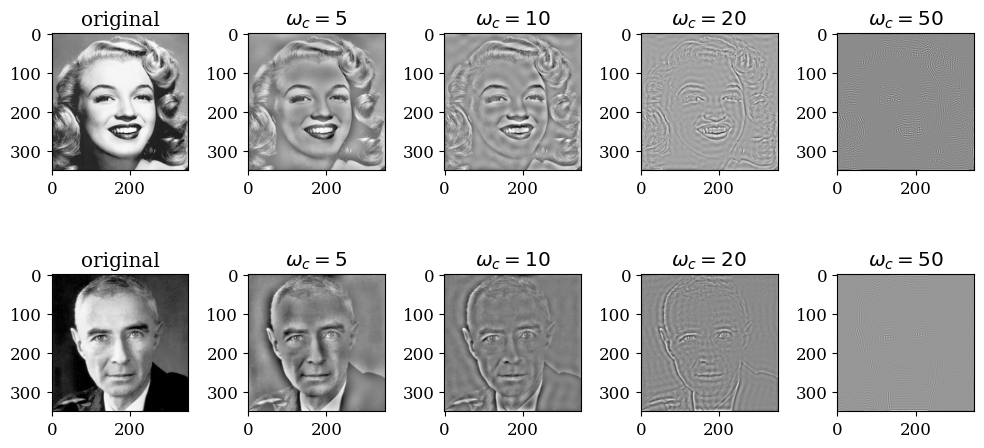

In [15]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
ax[0, 0].imshow(marilyn, cmap="Greys_r")
ax[0, 0].set_title("original")
ax[0, 1].imshow(image_high_pass_filter(FFT_marilyn, n=5).real, cmap="Greys_r")
ax[0, 1].set_title("$\omega_{c}=5$")
ax[0, 2].imshow(image_high_pass_filter(FFT_marilyn, n=10).real, cmap="Greys_r")
ax[0, 2].set_title("$\omega_{c}=10$")
ax[0, 3].imshow(image_high_pass_filter(FFT_marilyn, n=20).real, cmap="Greys_r")
ax[0, 3].set_title("$\omega_{c}=20$")
ax[0, 4].imshow(image_high_pass_filter(FFT_marilyn, n=50).real, cmap="Greys_r")
ax[0, 4].set_title("$\omega_{c}=50$")

ax[1, 0].imshow(robert, cmap="Greys_r")
ax[1, 0].set_title("original")
ax[1, 1].imshow(image_high_pass_filter(FFT_robert, n=5).real, cmap="Greys_r")
ax[1, 1].set_title("$\omega_{c}=5$")
ax[1, 2].imshow(image_high_pass_filter(FFT_robert, n=10).real, cmap="Greys_r")
ax[1, 2].set_title("$\omega_{c}=10$")
ax[1, 3].imshow(image_high_pass_filter(FFT_robert, n=20).real, cmap="Greys_r")
ax[1, 3].set_title("$\omega_{c}=20$")
ax[1, 4].imshow(image_high_pass_filter(FFT_robert, n=50).real, cmap="Greys_r")
ax[1, 4].set_title("$\omega_{c}=50$")
plt.tight_layout()

(e) Convolve using conv2(A, B, ‘same’) in MATLAB or scipy.signal.convolve2d(in1,
in2, mode="same") in Python the figures **marilyn.png** and **robert.png** with the following
kernels:

$K_{1} = \text{ones}((10, 10)), $
$K_{2} = \begin{bmatrix}1&0&-1\\2& 0&-2\\1&0&-1\end{bmatrix}, $
$K_{3} = \begin{bmatrix} 0&0&0\\ 0&1&0\\0&0&0\end{bmatrix}$

In [16]:
# define kernels
kernel_1 = np.ones((10, 10))
kernel_2 = np.array(([1, 0, -1], [2, 0, -2], [1, 0, -1]))
kernel_3 = np.array(([0, 0, 0], [0, 1, 0], [0, 0, 0]))

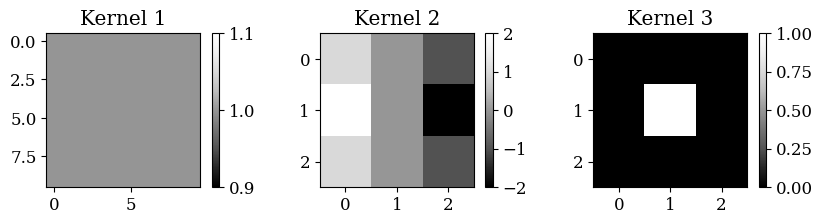

In [17]:
fig, ax = plt.subplots(ncols =3, figsize=(10, 2))
pos = ax[0].imshow(kernel_1, cmap="Greys_r")
fig.colorbar(pos, ax=ax[0])
ax[0].set_title("Kernel 1")

pos = ax[1].imshow(kernel_2, cmap="Greys_r")
fig.colorbar(pos, ax=ax[1])
ax[1].set_title("Kernel 2")

pos = ax[2].imshow(kernel_3, cmap="Greys_r", vmin=0, vmax=1)
fig.colorbar(pos, ax=ax[2])
_ = ax[2].set_title("Kernel 3")
#plt.tight_layout()

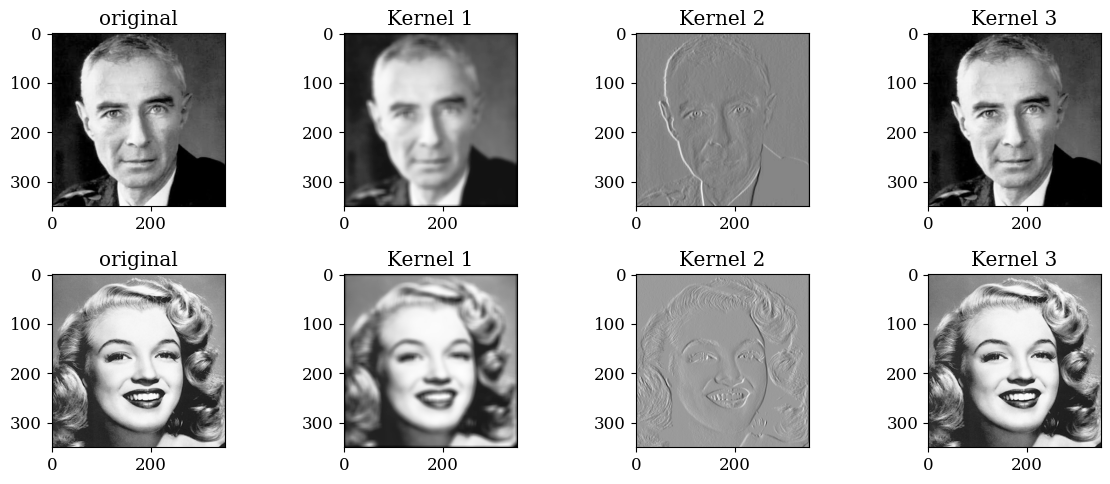

In [18]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(12, 5))

pos = ax[0, 0].imshow(robert, cmap="Greys_r")
ax[0, 0].set_title(r"original")

pos = ax[0, 1].imshow(scipy.signal.convolve2d(robert, kernel_1, mode="same"), cmap="Greys_r")
ax[0, 1].set_title(r"Kernel 1")

pos = ax[0, 2].imshow(scipy.signal.convolve2d(robert, kernel_2, mode="same"), cmap="Greys_r")
ax[0, 2].set_title(r"Kernel 2")

pos = ax[0, 3].imshow(scipy.signal.convolve2d(robert, kernel_3, mode="same"), cmap="Greys_r")
ax[0, 3].set_title(r"Kernel 3")

pos = ax[1, 0].imshow(marilyn, cmap="Greys_r")
ax[1, 0].set_title(r"original")

pos = ax[1, 1].imshow(scipy.signal.convolve2d(marilyn, kernel_1, mode="same"), cmap="Greys_r")
ax[1, 1].set_title(r"Kernel 1")

pos = ax[1, 2].imshow(scipy.signal.convolve2d(marilyn, kernel_2, mode="same"), cmap="Greys_r")
ax[1, 2].set_title(r"Kernel 2")

pos = ax[1, 3].imshow(scipy.signal.convolve2d(marilyn, kernel_3, mode="same"), cmap="Greys_r")
ax[1, 3].set_title(r"Kernel 3")
plt.tight_layout()